<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/linear_regression/01_LinearRegression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 156MB/s]


In [3]:
df = pd.read_csv("cars24-car-price-cleaned.csv")
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [4]:
df["model"].nunique(), df["make"].nunique()

(3233, 41)

In [5]:
df.shape

(19820, 18)

In [6]:
# converting categorical column to numerical so that model can understand
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [7]:
# Scaling the values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [9]:
# For testing data (mimic the test data to future data)
from sklearn.model_selection import train_test_split

In [10]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [11]:
# Spliting the data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13874, 17), (13874,), (5946, 17), (5946,))

In [12]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [15]:
model.coef_ # Weight vectors

array([0.9967642])

In [16]:
model.intercept_ # bias

0.0015237505846132926

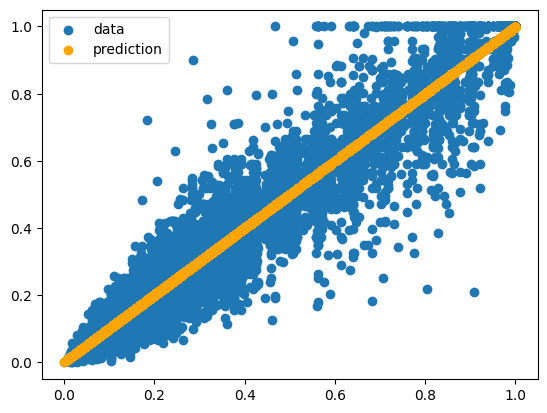

In [19]:
y_hat = model.predict(X1)
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

In [20]:
# Train with all the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.coef_ # 17-D

array([ 7.26831852e+11, -2.50610352e-01, -2.32537818e-01,  7.38776447e-02,
        4.70141495e-02,  7.26831852e+11,  6.62815814e-02,  8.59178586e-01,
       -7.22882618e-03, -7.02099753e-03,  7.03528760e-03,  1.32983308e-01,
        1.49877118e-02, -6.86552095e-03, -3.59124005e-03, -1.61993065e-02,
       -2.35818239e-02])

In [22]:
model.intercept_

-726831852169.8219

In [23]:
model.score(X_train, y_train)

0.9458971299221871

```
Given the data x (x[i] represents the values of independent variables for each ith observation), y (y[i] represents the value of the dependent variable for ith observation), and w (weights), return the sum of loss values for all the observations in x using the following formula:

Note: In this particular question consider the value of intercept(w0) to be zero. The loss should be rounded off to two decimal places.

Input Format:
Three numpy arrays of Independent Variables, Dependent Variables, and Weights are taken as an input

Output Format:
Return the loss value of the model rounded off to two decimal places.

Sample Input:
x = [[1.0, 0.0], [1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [1.0, 4.0], [1.0, 5.0], [1.0, 6.0], [1.0, 7.0], [1.0, 8.0], [1.0, 9.0]]
y = [32.69, 30.56, 32.04, 32.27, 35.98, 34.39, 40.25, 39.24, 37.14, 39.38]
w = [30.0, 1.0]

Sample Output:
1.81

Output Explanation:
1.81 is the loss calculated by finding sqaure of the difference between each of the y[i]
and the predicted value of the model. This loss is summed across each of the n sample
and then divided by 2n to get the mean
```

In [24]:
def cost(x, y, w):

  x = np.asarray(x)
  w = np.asarray(w)
  y = np.asarray(y)

  loss = 0

  prediction = np.dot(x, w)
  residuals = y - prediction
  sq_res = residuals ** 2
  loss = np.sum(sq_res) / (2*len(y))

  return round(loss,2)

In [25]:
x = [[1.0, 0.0], [1.0, 1.0], [1.0, 2.0], [1.0, 3.0], [1.0, 4.0], [1.0, 5.0], [1.0, 6.0], [1.0, 7.0], [1.0, 8.0], [1.0, 9.0]]
y = [32.69, 30.56, 32.04, 32.27, 35.98, 34.39, 40.25, 39.24, 37.14, 39.38]
w = [30.0, 1.0]

cost(x, y, w)

1.81